# TASK 4: EMAIL SPAM DETECTION WITH MACHINE LEARNING

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from mpl_toolkits.mplot3d import Axes3D


## Load the dataset

file_path = 'C:\\Users\\murug\\OneDrive\\Desktop\\spam.csv'  # Adjust the path as necessary
df = pd.read_csv('C:\\Users\\murug\\OneDrive\\Desktop\\spam.csv' , encoding='latin-1')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns for better understanding
df.columns = ['label', 'message']

##  Encode the label column (spam = 1, ham = 0)

In [3]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Data preprocessing: Convert text data to numerical data using TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['message']).toarray()
y = df['label']


## Split the data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


## Evaluate the model

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Confusion matrix

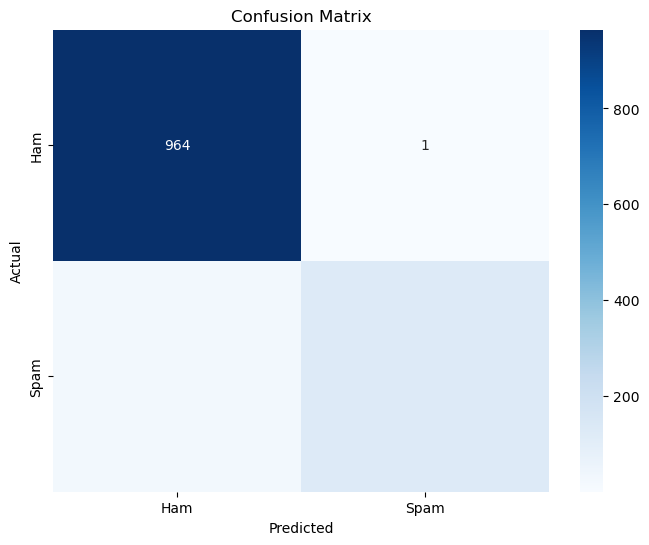

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##  Visualizations

### 1. Bar chart of the number of spam and ham messages

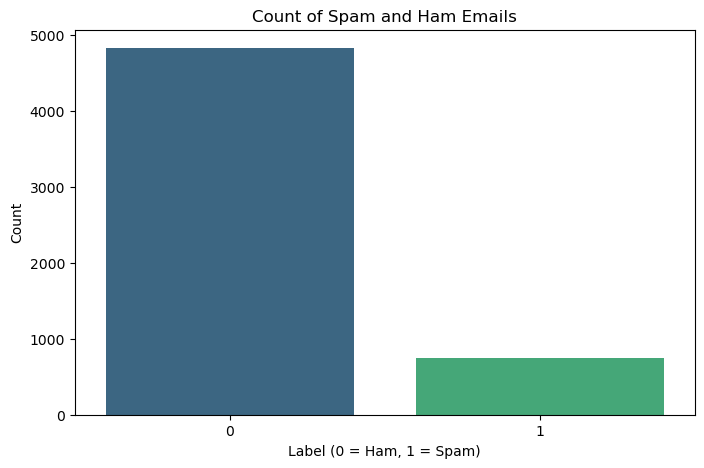

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Count of Spam and Ham Emails')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()


### 2. Pie chart of spam and ham distribution

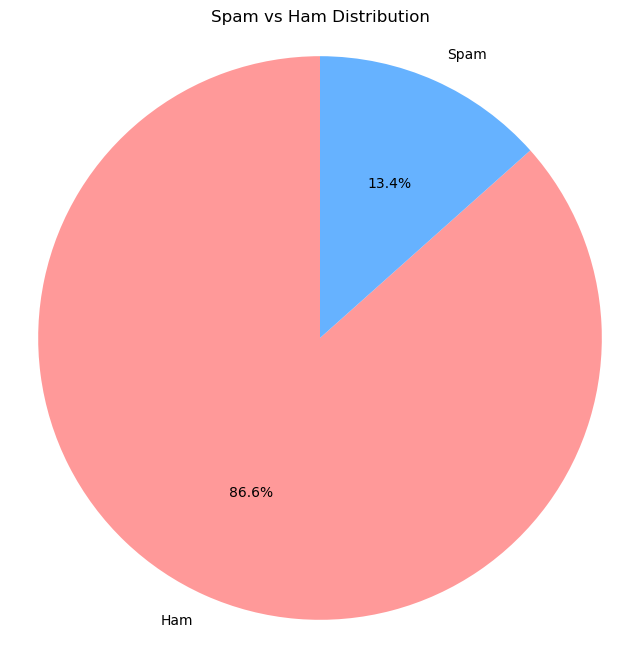

In [8]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])
plt.title('Spam vs Ham Distribution')
plt.axis('equal')
plt.show()

### 3. Correlation heatmap of features (using a subset for better visibility)


In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out()).corr().abs()
sns.heatmap(corr_matrix.iloc[:20, :20], annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of TF-IDF Features (Subset)')
plt.show()


###  4. 2D Scatter plot of two important TF-IDF features

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title('2D Scatter Plot: TF-IDF Feature 1 vs Feature 2')
plt.xlabel('TF-IDF Feature 1')
plt.ylabel('TF-IDF Feature 2')
plt.show()